# Finding Irregular Void by comparison of 0.90-1.00-Skeleton and 0.99-1.00-Skeleton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def distance(p1,p2):
    r = 0
    for i in range(3):
        r += (p1[i]-p2[i])**2
    return ( r )**0.5


BoxLength = 60

filename = "EllipVoid_R_[20, 10, 10, 10]_BL_60_clean.cat"

catalog = np.loadtxt(filename)
R = 10

X = catalog[:,0]
Y = catalog[:,1]
Z = catalog[:,2]

print("Catalog Shape:", catalog.shape)

Catalog Shape: (5417, 3)


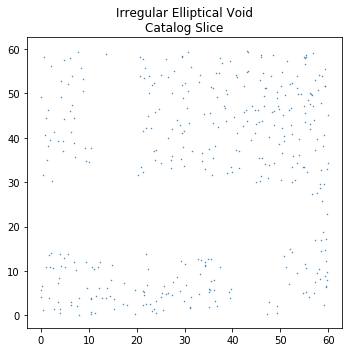

In [2]:
index = np.where( abs(catalog[:,2] - BoxLength / 2) < R / 4 )


fig = plt.figure(figsize=[5,5])
plt.scatter(catalog[index,0], catalog[index,1], s=0.2)
plt.title("Irregular Elliptical Void\nCatalog Slice")
plt.tight_layout()

plt.savefig("Irregular_Void_Catalog.pdf")

In [3]:
Beta_list = [ "1.00"]

"""
Beta_list = [ "0.90", "0.99", "1.00"]
"""



"""
for m in range(len(Beta_list)):
    beta_x = np.loadtxt("SV_R20_BS60_B_" + Beta_list[m] + ".bsk")

    fig = plt.figure(figsize=(6,6))
    for k in beta_x:
        i = int(k[0])
        j = int(k[1])
        if ( (abs(Z[i] - BoxLength / 2) < R / 4) or (abs(Z[j] - BoxLength / 2) < R / 4) ) :
            plt.plot( (X[i],X[j]), (Y[i],Y[j]) )
        # print(k)
    plt.xlim(0,BoxLength)
    plt.ylim(0,BoxLength)

    plt.title("Spherical Void (R = 20Mpc/h)\n" + r"$\beta =$ " + Beta_list[m])

    plt.xlabel("X (Mpc/h)")
    plt.ylabel("Y (Mpc/h)")


    plt.savefig( "beta_" + Beta_list[m] + ".png" )
    
    #plt.close()
"""

'\nfor m in range(len(Beta_list)):\n    beta_x = np.loadtxt("SV_R20_BS60_B_" + Beta_list[m] + ".bsk")\n\n    fig = plt.figure(figsize=(6,6))\n    for k in beta_x:\n        i = int(k[0])\n        j = int(k[1])\n        if ( (abs(Z[i] - BoxLength / 2) < R / 4) or (abs(Z[j] - BoxLength / 2) < R / 4) ) :\n            plt.plot( (X[i],X[j]), (Y[i],Y[j]) )\n        # print(k)\n    plt.xlim(0,BoxLength)\n    plt.ylim(0,BoxLength)\n\n    plt.title("Spherical Void (R = 20Mpc/h)\n" + r"$\x08eta =$ " + Beta_list[m])\n\n    plt.xlabel("X (Mpc/h)")\n    plt.ylabel("Y (Mpc/h)")\n\n\n    plt.savefig( "beta_" + Beta_list[m] + ".png" )\n    \n    #plt.close()\n'

# Where Connection Length (@ $\beta = 0.99$) is above Mean Length (@ $\beta = 1.0$)

In [4]:
a_label = "0.99"
b_label = "1.00"



a = np.loadtxt("IRR_V_R20_BL60_B_" + a_label +".bsk")
b = np.loadtxt("IRR_V_R20_BL60_B_" + b_label +".bsk")

a = a.astype(int)
b = b.astype(int)

a_connections = []
b_connections = []

for i in range( catalog.shape[0] ):
    a_connections.append(np.where(a[:,0]==i)[0].shape[0])
    b_connections.append(np.where(b[:,0]==i)[0].shape[0])

 # Connection Length

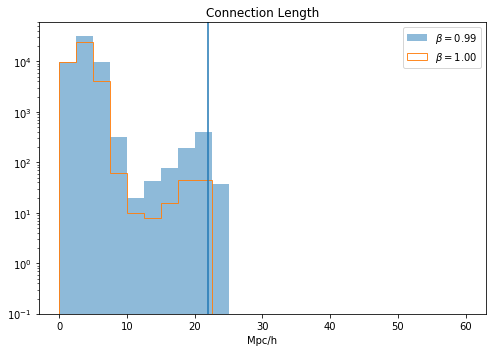

In [5]:
a_dist = []
b_dist = []

for k in a:
    a_dist.append( distance( catalog[k[0]], catalog[k[1]]) )
    
for k in b:
    b_dist.append( distance( catalog[k[0]], catalog[k[1]]) )    
    
a_dist = np.array(a_dist)
b_dist = np.array(b_dist)

R_cut = max(b_dist)


bins = np.linspace(0,60,25)

fig = plt.figure(figsize=(7,5))
plt.hist( a_dist, bins, log=True, alpha=0.5, label=r"$\beta=$" + a_label )
plt.hist( b_dist, bins, log=True, alpha=0.9, label=r"$\beta=$" + b_label , histtype="step")
plt.xlabel("Mpc/h")
plt.legend()
plt.title("Connection Length")
plt.axvline(R_cut)

plt.tight_layout()
plt.savefig("ConnectionLenghtHistogram_for_" + a_label + "-" + b_label + "-skeletons.pdf")

#plt.close()

(96, 3)


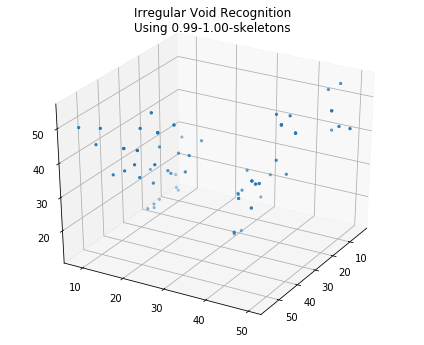

In [6]:
index = np.where( (a_dist[:] > R_cut) )
sphere = catalog[a[index[0],0]]
print(sphere.shape)

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=5)
ax.view_init(30, 30)

plt.title("Irregular Void Recognition\nUsing " + a_label + "-" + b_label + "-skeletons")
plt.tight_layout()
plt.savefig("IrregularVoidSurface_for_" + a_label + "-" + b_label + "-skeletons.pdf")
#plt.close()

plt.show()


# Where Connection Length (@ $\beta = 0.90$) is above Mean Length (@ $\beta = 1.0$)

In [7]:
a_label = "0.90"
b_label = "1.00"



a = np.loadtxt("IRR_V_R20_BL60_B_" + a_label +".bsk")
b = np.loadtxt("IRR_V_R20_BL60_B_" + b_label +".bsk")

a = a.astype(int)
b = b.astype(int)

a_connections = []
b_connections = []

for i in range( catalog.shape[0] ):
    a_connections.append(np.where(a[:,0]==i)[0].shape[0])
    b_connections.append(np.where(b[:,0]==i)[0].shape[0])

 # Connection Length

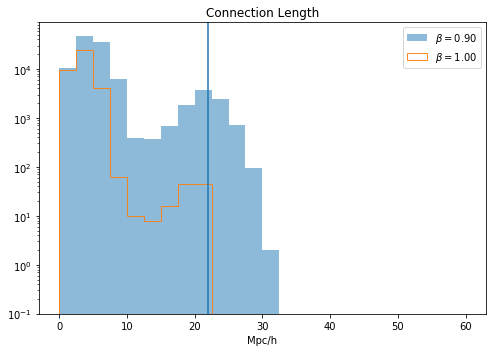

In [8]:
a_dist = []
b_dist = []

for k in a:
    a_dist.append( distance( catalog[k[0]], catalog[k[1]]) )
    
for k in b:
    b_dist.append( distance( catalog[k[0]], catalog[k[1]]) )    
    
a_dist = np.array(a_dist)
b_dist = np.array(b_dist)

R_cut = max(b_dist)

bins = np.linspace(0,60,25)

fig = plt.figure(figsize=(7,5))
plt.hist( a_dist, bins, log=True, alpha=0.5, label=r"$\beta=$" + a_label )
plt.hist( b_dist, bins, log=True, alpha=0.9, label=r"$\beta=$" + b_label, histtype="step")
plt.xlabel("Mpc/h")
plt.legend()
plt.title("Connection Length")
plt.axvline(R_cut)


plt.tight_layout()
plt.savefig("ConnectionLenghtHistogram_for_" + a_label + "-" + b_label + "-skeletons.pdf")
#plt.close()

(4066, 3)


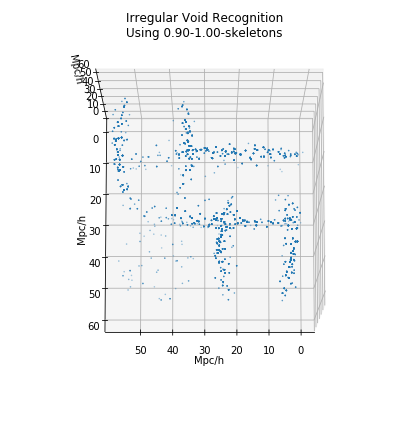

In [13]:
index = np.where( (a_dist[:] > R_cut) )
sphere = catalog[a[index[0],0]]
print(sphere.shape)

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.set_xlabel("Mpc/h")
ax.set_ylabel("Mpc/h")
ax.set_zlabel("Mpc/h")
ax.scatter(x, y, z, s=0.3)
ax.view_init(80, 90)


plt.title("Irregular Void Recognition\nUsing " + a_label + "-" + b_label + "-skeletons")
#plt.show()

plt.tight_layout()
plt.savefig("IrregularVoidSurface_for_" + a_label + "-" + b_label + "-skeletons.pdf")
#plt.close()

In [14]:
index[0]

array([   109,    110,    111, ..., 109476, 109477, 109478])